In [4]:
import pandas as pd
movies=pd.read_csv(r"C:\Users\Appala nithin\OneDrive\Pictures\Documents\NARESH-IT\my-projects\movies recomendation\movies.csv")

In [6]:
movies.shape

(9742, 3)

In [8]:
ratings=pd.read_csv(r"C:\Users\Appala nithin\OneDrive\Pictures\Documents\NARESH-IT\my-projects\movies recomendation\ratings.csv")

In [10]:
ratings.shape

(100836, 4)

In [40]:
tags=pd.read_csv(r"C:\Users\Appala nithin\OneDrive\Pictures\Documents\NARESH-IT\my-projects\movies recomendation\tags.csv")

In [12]:
unique_user_ids = ratings['userId'].nunique()
print(unique_user_ids)

610


In [42]:
merged = pd.merge(ratings, movies,tags, on='movieId')


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [18]:
ratings_count = merged_df.groupby('title').size()

In [20]:
most_rated_movie = ratings_count.idxmax()
most_rated_count = ratings_count.max()

print(f"The movie with the maximum number of user ratings is '{most_rated_movie}' with {most_rated_count} ratings.")

The movie with the maximum number of user ratings is 'Forrest Gump (1994)' with 329 ratings.


In [44]:
ratings_movies = pd.merge(ratings, movies, on='movieId')

In [70]:
merged = pd.merge(ratings_movies, tags, on='movieId')

# Display the merged DataFrame
print(merged.head())

   userId_x  movieId  rating  timestamp_x                    title  \
0         1        1     4.0    964982703         Toy Story (1995)   
1         1        1     4.0    964982703         Toy Story (1995)   
2         1        1     4.0    964982703         Toy Story (1995)   
3         1        3     4.0    964981247  Grumpier Old Men (1995)   
4         1        3     4.0    964981247  Grumpier Old Men (1995)   

                                        genres  userId_y    tag  timestamp_y  
0  Adventure|Animation|Children|Comedy|Fantasy       336  pixar   1139045764  
1  Adventure|Animation|Children|Comedy|Fantasy       474  pixar   1137206825  
2  Adventure|Animation|Children|Comedy|Fantasy       567    fun   1525286013  
3                               Comedy|Romance       289  moldy   1143424860  
4                               Comedy|Romance       289    old   1143424860  


In [72]:
movie_tags = merged[merged['title'] == 'Matrix, The (1999)']['tag']

In [82]:
print(movie_tags)

460             martial arts
461                   sci-fi
462       alternate universe
463               philosophy
464         post apocalyptic
                 ...        
232078          martial arts
232079                sci-fi
232080    alternate universe
232081            philosophy
232082      post apocalyptic
Name: tag, Length: 1390, dtype: object


In [84]:
movie_ratings = ratings_movies[ratings_movies['title'] == 'Terminator 2: Judgment Day (1991)']

In [86]:
average_rating = movie_ratings['rating'].mean()

In [88]:
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is 3.97


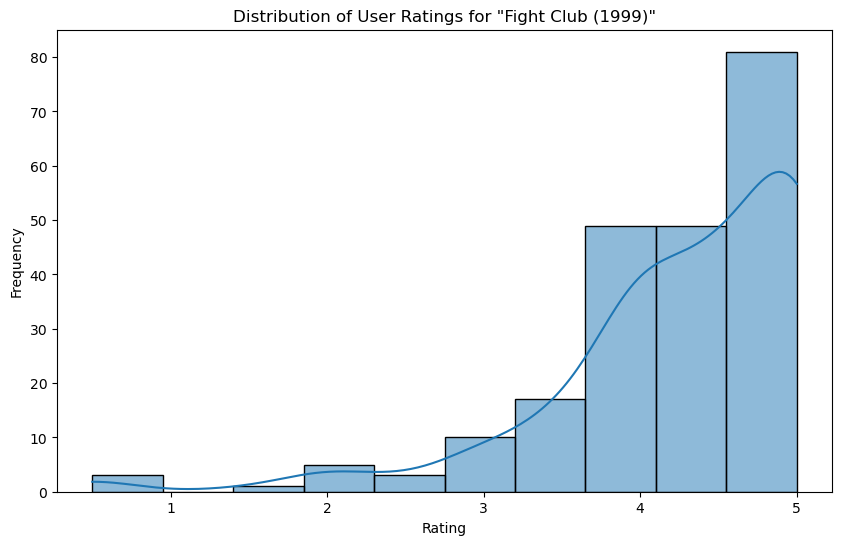

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
movie_ratings = ratings_movies[ratings_movies['title'] == 'Fight Club (1999)']['rating']

plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings, kde=True, bins=10)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [92]:
ratings_grouped = ratings.groupby('movieId').agg(
    num_ratings=('rating', 'count'),  # Count of ratings
    mean_rating=('rating', 'mean')    # Mean rating
).reset_index()

# Step 2: Merge the grouped ratings DataFrame with the movies DataFrame
merged_df = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['num_ratings'] > 50]

# Display the resulting DataFrame
print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  num_ratings  mean_rating  
0  Adventure|Animation|Children|Comedy|Fantasy          215     3.920930  
1                   Adventure|Children|Fantasy          110     3.431818  
2                               Comedy|Romance           52     3.259615  
5                        Action|Crime|Thriller          102     3.946078  
6                               Comedy|Romance           54     3.185185  


In [94]:
ratings_grouped = ratings.groupby('movieId').agg(
    num_ratings=('rating', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()

# Step 2: Merge the grouped ratings DataFrame with the movies DataFrame
merged_df = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['num_ratings'] > 50]

# Step 4: Find the movie with the highest average rating
most_popular_movie = filtered_movies.loc[filtered_movies['mean_rating'].idxmax()]

# Display the most popular movie and its average rating
print(f"The most popular movie based on average user ratings is '{most_popular_movie['title']}' with an average rating of {most_popular_movie['mean_rating']:.2f}.")

The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43.


In [96]:
merged_df = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['num_ratings'] > 50]

# Step 4: Get the top 5 movies based on the number of ratings
top_5_movies = filtered_movies.sort_values(by='num_ratings', ascending=False).head(5)

# Display the top 5 movies and their number of ratings
print(top_5_movies[['title', 'num_ratings']])

                                 title  num_ratings
314                Forrest Gump (1994)          329
277   Shawshank Redemption, The (1994)          317
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1938                Matrix, The (1999)          278


In [100]:
ratings_grouped = ratings.groupby('movieId').agg(
    num_ratings=('rating', 'count'),
    mean_rating=('rating', 'mean')
).reset_index()

# Step 2: Merge the grouped ratings DataFrame with the movies DataFrame
merged_df = pd.merge(movies, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['num_ratings'] > 50]

# Step 4: Filter Sci-Fi movies
# Ensure that the 'genres' column exists and contains genre information
sci_fi_movies = filtered_movies[filtered_movies['title'].str.contains('Sci-Fi')]

# Debugging: Print the number of Sci-Fi movies
print(f"Number of Sci-Fi movies with more than 50 ratings: {len(sci_fi_movies)}")

# Step 5: Check if there are at least 3 Sci-Fi movies
if len(sci_fi_movies) >= 3:
    # Sort Sci-Fi movies by number of ratings and select the third most popular
    sci_fi_movies_sorted = sci_fi_movies.sort_values(by='num_ratings', ascending=False)
    third_most_popular_sci_fi = sci_fi_movies_sorted.iloc[2]

    # Display the third most popular Sci-Fi movie and its number of ratings
    print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{third_most_popular_sci_fi['title']}' with {third_most_popular_sci_fi['num_ratings']} ratings.")
else:
    print("There are fewer than three Sci-Fi movies with more than 50 ratings.")

Number of Sci-Fi movies with more than 50 ratings: 0
There are fewer than three Sci-Fi movies with more than 50 ratings.


In [102]:
pip install requests beautifulsoup4 pandas


In [104]:
links_df = pd.read_csv(r"C:\Users\Appala nithin\OneDrive\Pictures\Documents\NARESH-IT\my-projects\movies recomendation\links.csv")

In [108]:
print(links_df.columns)

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [134]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [136]:
import pandas as pd
import requests  # Ensure this line is included to import the requests library
from bs4 import BeautifulSoup  # Ensure this line is included to import BeautifulSoup


# Initialize a list to store movie ratings
ratings_data = []

# Iterate over each row in the links DataFrame
for index, row in links_df.iterrows():
    movie_id = row['movieId']
    imdb_link = row['imdbId']  # Make sure this matches the actual column name in your CSV file
    
    try:
        # Send an HTTP request to the IMDb page
        response = requests.get(imdb_link)
        response.raise_for_status()  # Check if the request was successful

        # Parse the page content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the IMDb rating on the page (modify the selector based on IMDb page structure)
        rating = soup.find('span', itemprop='ratingValue')
        if rating:
            rating_value = float(rating.get_text(strip=True))
            ratings_data.append({'movieId': movie_id, 'rating': rating_value})

    except requests.RequestException as e:
        print(f"Error fetching rating for movie ID {movie_id}: {e}")

# Convert ratings data to a DataFrame
ratings_df = pd.DataFrame(ratings_data)

# Find the movie with the highest IMDb rating
highest_rated_movie = ratings_df.loc[ratings_df['rating'].idxmax()]

# Display the movieId with the highest IMDb rating
print(f"The movieId of the movie with the highest IMDb rating is {highest_rated_movie['movieId']}.")


Error fetching rating for movie ID 1.0: Invalid URL '114709.0': No scheme supplied. Perhaps you meant https://114709.0?
Error fetching rating for movie ID 2.0: Invalid URL '113497.0': No scheme supplied. Perhaps you meant https://113497.0?
Error fetching rating for movie ID 3.0: Invalid URL '113228.0': No scheme supplied. Perhaps you meant https://113228.0?
Error fetching rating for movie ID 4.0: Invalid URL '114885.0': No scheme supplied. Perhaps you meant https://114885.0?
Error fetching rating for movie ID 5.0: Invalid URL '113041.0': No scheme supplied. Perhaps you meant https://113041.0?
Error fetching rating for movie ID 6.0: Invalid URL '113277.0': No scheme supplied. Perhaps you meant https://113277.0?
Error fetching rating for movie ID 7.0: Invalid URL '114319.0': No scheme supplied. Perhaps you meant https://114319.0?
Error fetching rating for movie ID 8.0: Invalid URL '112302.0': No scheme supplied. Perhaps you meant https://112302.0?
Error fetching rating for movie ID 9.0: 

KeyError: 'rating'